# Support Vector Machines (SVM) - Hard Margin Case
---
Recall the binary classification problem that SVMs try to solve. The hard margin SVM finds the seperating decision bounary with the largest margin. 

<img src="MaxMargin.jpg" height="400" width="400">

In this assigment, you will write the code to find the maximum margin for the hard margin case.

We showed in class that we could solve this problem  by reducing it to the problem of solving a quadratic programming problem (QP).  There are many solvers for quadratic programming problems. We will use the *Convex Optimization Library*, [CVXOPT](https://cvxopt.org/userguide/coneprog.html#quadratic-programming); a free software package that works well with Python and numpy. 
You will need to install [CVXOPT](https://cvxopt.org/install/)

In CVXOPT, the quadratic programming problem solver, <b><i>cvxopt.solvers.qp</i></b>,  solves the following problem:

$$\begin{eqnarray} \min_{x}\frac{1}{2} x^{T}Px - q^{T}x \nonumber \\\ \textrm{s.t.}\quad Gx \preceq h \\\ \textrm{and}\quad Ax = b \end{eqnarray}$$

 Note that $ Gx \preceq h $ is taken elementwise. 

The solver's (simplified) API is `cvxopt.solvers.qp(P, q, G, h, A, b)` 
where only $P$ and $q$ are required. 

You will need to match the solver's API.

The solver's argument's type must be CVXOPT matrices. I suggest you first create the arguments as NumpPy arrays and matrices and then convert them to CVXOPT matrices (For example, first import the library: `from cvxopt import matrix` then convert a NumPy matrix `P` to a CVXOPT matrix using ` P = matrix(P)`)

What is return by the solver  is a Python dictionary.  If you save the return value in a variable called `sol` (i.e. `sol = solvers.qp(...)`), you can access to the solution of the quadratic programming problem by typing `sol["x"]`.


# Hard Margin Case

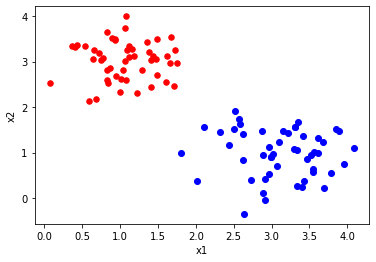

In [1]:
import numpy
import numpy as np
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
# import sys
# sys.path.append('C:\Python27\Lib\site-packages')
# import sys
# sys.path.append("C:\Program Files (x86)\Python\lib\site-packages\cvxopt")
import cvxopt
from cvxopt import matrix 
from cvxopt import solvers 
from io import StringIO
%matplotlib inline
from pathlib import Path
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Use numpy function genfromtxt(…, delimiter=…) to load from files.
file = Path.cwd() / 'X.csv'
file_y = Path.cwd() / 'y.csv'
X=np.genfromtxt(file,delimiter=',')
y=np.genfromtxt(file_y,delimiter=',')
# Store the data from “X.csv” to X and target from “y.csv” to y

# Use np.where to find all index of data which y=1 and store them to idx_1
idx_1= np.where(y==1)
idx_2= np.where(y==-1)

# same as y=-1, store them to idx_2

# make the plot use plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o")
plt.scatter(X[idx_1,0], X[idx_1,1], c='b', marker="o")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='r', marker="o")
# Set the x label with x1 and y label with x2
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

## SVM Primal  Problem
---
### Problem 1.1
![qp.png](attachment:qp.png)
You will now use the quadratic problem solver to find the maximum margin for the SVM primal problem:

$$\begin{eqnarray}\left.\begin{aligned}  
&\min_{w}\frac{1}{2}||w||^{2} & \nonumber \\\ 
&\textrm{s.t.}  \quad y^{(i)}(w^{T}{\bf x}^{(i)} + w_0) \ge 1 \quad \forall i \end{aligned}\right.\end{eqnarray}$$


Look back at the lecture notes for the primal problem.  Please note that the variable names used in the lecture are different from the variable names given to decribe the API for CVXOPT's quadratic problem solver.


In [2]:
def linear_svm(X,y):
    solvers.options['show_progress'] = False
#     store the shape of X to two variables: N,F
    N,F=X.shape
#     create the Identity matrix using np.diag and np.ones
#     I=np.eye(100)
#     create the Q matrix using np.zeros
    Q=np.identity(F + 1)
    Q[0,0]=0
#     print(Q)
    p=cvxopt.matrix(Q)
    q = cvxopt.matrix(np.zeros(F+1))
    g=[]
    for n in range(N):
        z=np.zeros(F+1)
        for i in range(F+1):
            if i==0:
                z[i]=1
            else:
                z[i]=X[n].T[i-1]
        g.append(y[n]*z)
    g=-1*np.array(g)
    G=cvxopt.matrix(g)
            
#     print('G',G)
#     print('shape of G',np.zeros((N, F + 1)).shape)
#     for n in range(N):

#         create a zero matric with size F+1

#         for each element in the matric above:

#             when the index=0, then set it to 1

#             else, set the value to X[n].T[i-1]

#         append the y[n]*updated matric to the empty list above (the one above the for loop

#     change the empty list to the np array and times -1

#     use cvxopt.matrix to convert above np array and store it in a variable: G

#     create a variable named h with value np.ones(N)*-1 and convert it to cvxopt

    h=cvxopt.matrix(np.ones(N)*-1)
#     print('h',h)
#     print('shape of h',np.ones(N).shape)

#     solve the primal using cvxopt.solvers.qp

#     return the answer.
    sol = cvxopt.solvers.qp(p, q, G, h)
    w = np.zeros(F,)
    for i in range(1, F + 1):
        w[i - 1] = sol["x"][i]
    b= np.array(sol['x'][0])
    return w,b

# fit svm classifier

# print the weights

### Plotting the  decision boundary

In [7]:
def plot_data_with_decision_boundary(X, y,w,b, fig_size=(15, 9), labels=['x1', 'x2']):
    x = np.linspace(0,5,100)
    
    yplot= x*(-w[0]/w[1])+(b/-w[1])
    plt.plot(x, yplot)
    
    idx_1= np.where(y==1)
    idx_2= np.where(y==-1)

# same as y=-1, store them to idx_2

# make the plot use plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o")
    plt.scatter(X[idx_1,0], X[idx_1,1], c='b', marker="o")
    plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='r', marker="o")
# Set the x label with x1 and y label with x2
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.show()
    
#     plot the dataset

#     find the slope of the decision boundary

#     find the intercept.

#     generate several x values np.arrange()

#     calculate its y values using intercept and slope

#     plot a line


# plotting the points and decision boundary using the above function   


Determine which points are closest to the decision boundary. What is the functional margin of the points closest to the decision boundary?   

In [4]:
# calculate distance from each point to the decision boundary
# w,b=linear_svm(X,y)
# x = np.linspace(0,5,100)
# yplot= x*(-w[0]/w[1])+(b/-w[1])





# find the nearest data points and its index.




Write the decision function $f_{\texttt{primal}}({\bf x})$ to predict examples.  Use this function to predict the label of $(3.0, 1.5)^T$ and $(1.2, 3.0)^T$

In [5]:
def f_primal(w,b,x1,x2,y1,y2):
    x = np.linspace(0,5,100)
    yplot= x*(-w[0]/w[1])+(b/-w[1])
    plt.plot(x, yplot)
    plt.plot(x1, y1, 'bo')
    plt.plot(x2, y2, 'ro')
    plt.show()
    

    #     return the predicted value using svm primal

    # using f_ primal() to predict (3.0, 1.5) and (1.2, 3.0) and plot the figure.

weights [ 1.42189318 -1.58830104]
bias 0.46118098859684725


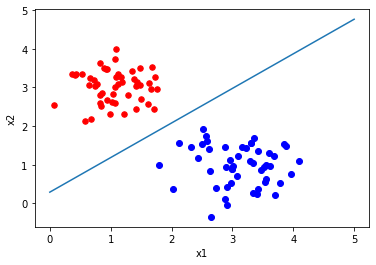

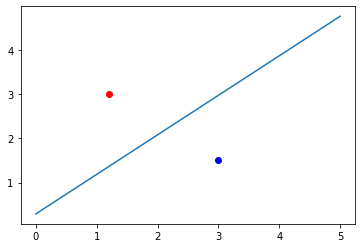

support vector index  25  distance   0.4690918454725177   [2.11457352 1.5537852 ]
support vector index  49  distance   0.4690918443084856   [2.51879639 1.91565724]
support vector index  68  distance   0.46909184341306576   [1.71138733 2.45204836]
MARGIN 0.9381836877215514


In [6]:
w,b=linear_svm(X,y)

print('weights',w)
print('bias',b)

plot_data_with_decision_boundary(X, y,w,b, fig_size=(15, 9), labels=['x1', 'x2'])

f_primal(w,b,3.0,1.2,1.5,3.0)

N,F=X.shape
p1=[0,0*(-w[0]/w[1])+(b/-w[1])]
p2=[5,5*(-w[0]/w[1])+(b/-w[1])]
p1=np.array(p1)
p2=np.array(p2)
for i in range(N):
    p3=np.array(X[i])
    d=np.abs(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))
    if d<0.5:
        print('support vector index ',i,' distance  ',d,' ',X[i])
        if (i==49):
            m1=d
        if (i==68):
            m2=d
        
print('MARGIN',m1+m2) 



Instructions on running program:
1. Run last block of code to show line plotted along all points. It also displays the points (3.0, 1.5)--> blue and  (1.2, 3.0)--> red and shows weights and bias.
2. Run the last block of code to display distances, indexes of support vectors, and margin.